# Домашнее задание 3. Свёрточные и рекуррентные нейронные сети
## Урюпин Денис, ИУ8-84


В зависимости от варианта, для решения задачи используйте следующие наборы данных:

<table>
    <thead>
         <tr>
            <th colspan=1>Задача генерации</th>
            <th colspan=5>Задача классификации</th>
        </tr>
        <tr>
            <th> </th>
            <th>A</th>
            <th>B</th>
            <th>C</th>
            <th>D</th>
            <th>E</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>K</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
        </tr>
        <tr>
            <td>L</td>
            <td>6</td>
            <td>7</td>
            <td>8</td>
            <td>9</td>
            <td>10</td>
        </tr>
        <tr>
            <td>M</td>
            <td>11</td>
            <td>12</td>
            <td>13</td>
            <td>14</td>
            <td>15</td>
        </tr>
        <tr>
            <td>N</td>
            <td>16</td>
            <td>17</td>
            <td>18</td>
            <td>19</td>
            <td>20</td>
        </tr>
        <tr>
            <td>O</td>
            <td>21</td>
            <td>22</td>
            <td>23</td>
            <td>24</td>
            <td>25</td>
        </tr>
    </tbody>
</table>

### Наборы данных

**Задача классификации картинок**

A. [Набор данных "Fashion MNIST"](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) `torchvision.datasets.FashionMNIST train=True и False`

B. [Набор данных "Текстуры"](https://pytorch.org/vision/main/generated/torchvision.datasets.DTD.html#torchvision.datasets.DTD) `torchvision.datasets.DTD split='train' и 'test'`

C. [Набор данных "Буквы"](https://pytorch.org/vision/main/generated/torchvision.datasets.EMNIST.html#torchvision.datasets.EMNIST) `torchvision.datasets.EMNIST split=letters train=True и False`

D. [Набор данных "Кошки и собаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.OxfordIIITPet.html) `torchvision.datasets.OxfordIIITPet split = 'trainval' и 'test'` (объекты разбиты по породам (всего 37 пород), нужно построить бинарный классификатор собак и кошек)

E. [Набор данных "Дорожные знаки"](https://pytorch.org/vision/main/generated/torchvision.datasets.GTSRB.html) `torchvision.datasets.GTSRB split = 'train' и 'test'`


---

**Задача генерации текстов**

K. [Набор данных "Евгений Онегин"]() `onegin.txt`

L. [Набор данных "Война и Мир"]() `war_and_piece.txt`

M. [Набор данных "Стихи"]() `stihi.csv`

N. [Набор данных "Сказки"]() `fairytales.txt`

O. [Набор данных "Новости"]() `news.txt` или https://github.com/yutkin/Lenta.Ru-News-Dataset/releases

# 0. Инициализация библиотек

In [ ]:
import numpy as np
import pandas as pd
import torch, torchvision 
from torch import nn 
from torch import optim 
from torchvision.transforms import ToTensor 
import torch.nn.functional as F 
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO
import copy
import re 
import numpy as np
import pandas as pd
import torch

import torchvision
from torch import nn
from torch.utils.data import DataLoader

# 1. Свёрточная нейронная сеть для классификации изображений (9 баллов)

## 1.1 Загрузка данных, разделение на train и test

Загрузите данные при помощи torchvision.datasets. Можете предусмотреть опредлённые транфсофрмации картинки, например, изменение размера до 128 px, кроп по центру в 196 px и преобразование к классу torch.Tensor:

```
import torchvision


transform = torchvision.transforms.Compose([
    # resize
    torchvision.transforms.Resize(128),
    torchvision.transforms.CenterCrop(196),
    torchvision.transforms.ToTensor()
])
```

In [ ]:
import torchvision
data_transforms = torchvision.transforms.Compose([
                                            torchvision.transforms.Resize((32, 32)),
                                            torchvision.transforms.ToTensor()
])
train_data = torchvision.datasets.GTSRB('train_data', download=True, split='train', transform=data_transforms)
test_data = torchvision.datasets.GTSRB('test_data', download=True, split='test', transform=data_transforms)

  0%|          | 0/187490228 [00:00<?, ?it/s]

Extracting train_data/gtsrb/GTSRB-Training_fixed.zip to train_data/gtsrb


  0%|          | 0/88978620 [00:00<?, ?it/s]

Extracting test_data/gtsrb/GTSRB_Final_Test_Images.zip to test_data/gtsrb


  0%|          | 0/99620 [00:00<?, ?it/s]

Extracting test_data/gtsrb/GTSRB_Final_Test_GT.zip to test_data/gtsrb


In [ ]:
numb_batch = 128
train_dl =  torch.utils.data.DataLoader(train_data, batch_size = numb_batch, shuffle=True)
test_dl =  torch.utils.data.DataLoader(test_data, batch_size = numb_batch, shuffle=False)

## 1.2 Предобработка данных (по необходимости)

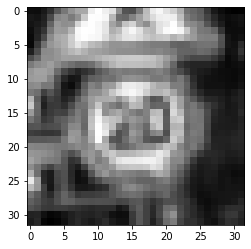

In [ ]:
plt.imshow(train_data[0][0][0], cmap='gray')

In [ ]:
next(iter(train_dl))[0].shape

torch.Size([128, 3, 32, 32])

## 1.3 Инициализация объекта свёрточной нейронной сети

Создайте нейронную сеть с 2-4 свёрточными слоями. В остальном конфигурация сети может быть произвольной. 

In [ ]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.fc1 = nn.Linear(6 * 6 * 128, 128)  # !!!
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 43)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        #(6,6)
        #print(x.shape)
        x = x.view(-1, 6 * 6 * 128)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 1.4 Обучение сввёрточной нейронной сети для решения задачи классификации

In [ ]:
from tqdm import tqdm_notebook

import torchvision.models as models

device = 'cuda' if torch.cuda.is_available() else 'cpu' 

net = MyConvNet().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm_notebook(range(5)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(train_dl)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выводем качество каждые 20 батчей
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0

print('Обучение закончено')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/209 [00:00<?, ?it/s]

[1,    20] loss: 72.564
[1,    40] loss: 68.240
[1,    60] loss: 64.193
[1,    80] loss: 55.674
[1,   100] loss: 49.159
[1,   120] loss: 42.015
[1,   140] loss: 35.580
[1,   160] loss: 30.597
[1,   180] loss: 25.821
[1,   200] loss: 22.867


  0%|          | 0/209 [00:00<?, ?it/s]

[2,    20] loss: 19.279
[2,    40] loss: 16.963
[2,    60] loss: 13.722
[2,    80] loss: 12.541
[2,   100] loss: 12.041
[2,   120] loss: 11.866
[2,   140] loss: 9.875
[2,   160] loss: 9.425
[2,   180] loss: 8.528
[2,   200] loss: 8.133


  0%|          | 0/209 [00:00<?, ?it/s]

[3,    20] loss: 6.515
[3,    40] loss: 6.937
[3,    60] loss: 6.678
[3,    80] loss: 5.864
[3,   100] loss: 5.348
[3,   120] loss: 5.101
[3,   140] loss: 4.869
[3,   160] loss: 4.980
[3,   180] loss: 4.155
[3,   200] loss: 4.528


  0%|          | 0/209 [00:00<?, ?it/s]

[4,    20] loss: 3.777
[4,    40] loss: 3.808
[4,    60] loss: 2.896
[4,    80] loss: 3.408
[4,   100] loss: 2.944
[4,   120] loss: 3.577
[4,   140] loss: 2.832
[4,   160] loss: 2.560
[4,   180] loss: 4.099
[4,   200] loss: 3.030


  0%|          | 0/209 [00:00<?, ?it/s]

[5,    20] loss: 2.358
[5,    40] loss: 2.475
[5,    60] loss: 2.082
[5,    80] loss: 1.926
[5,   100] loss: 2.204
[5,   120] loss: 2.572
[5,   140] loss: 2.608
[5,   160] loss: 1.740
[5,   180] loss: 2.702
[5,   200] loss: 2.733
Обучение закончено


In [ ]:
classes = ('Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 
'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 
'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow','Wild animals crossing', 
'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 
'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons')

In [ ]:
class_correct = list(0. for i in range(43))
class_total = list(0. for i in range(43))

with torch.no_grad():
    for data in test_dl:
        images, labels = data
        y_pred = net(images.to(device))#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(86):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(43):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100*class_correct[i] / class_total[i]))

Accuracy of Speed limit (20km/h) : 74 %
Accuracy of Speed limit (30km/h) : 93 %
Accuracy of Speed limit (50km/h) : 85 %
Accuracy of Speed limit (60km/h) : 84 %
Accuracy of Speed limit (70km/h) : 89 %
Accuracy of Speed limit (80km/h) : 88 %
Accuracy of End of speed limit (80km/h) : 66 %
Accuracy of Speed limit (100km/h) : 69 %
Accuracy of Speed limit (120km/h) : 87 %
Accuracy of No passing : 92 %
Accuracy of No passing veh over 3.5 tons : 93 %
Accuracy of Right-of-way at intersection : 84 %
Accuracy of Priority road : 89 %
Accuracy of Yield : 98 %
Accuracy of  Stop : 95 %
Accuracy of No vehicles : 97 %
Accuracy of Veh > 3.5 tons prohibited : 92 %
Accuracy of No entry : 90 %
Accuracy of General caution : 62 %
Accuracy of Dangerous curve left : 58 %
Accuracy of Dangerous curve right : 94 %
Accuracy of Double curve : 51 %
Accuracy of Bumpy road : 90 %
Accuracy of Slippery road : 60 %
Accuracy of Road narrows on the right : 35 %
Accuracy of Road work : 91 %
Accuracy of Traffic signals : 82 

## 1.5 Агументация данных и регулряизации нейросети

Попобуйте добавить аугументацию (случайные повороты, увеличение, уменьшение) в данные, а также регуляризацию (Drop out и Batch Norm слои) в модель. Как меняется метрика accuracy на обучающей и тестовой выборке в процессе обучения? Постройте график.

In [ ]:
import torchvision
data_transforms = torchvision.transforms.Compose([
                                            torchvision.transforms.RandomVerticalFlip(p=0.6),
                                            torchvision.transforms.RandomHorizontalFlip(p=0.4),  
                                            torchvision.transforms.RandomResizedCrop(size=(40, 40), scale=(0.2, 0.8), ratio=(0.5, 1.08)),
                                            torchvision.transforms.Resize((32, 32)),
                                            torchvision.transforms.ToTensor()
])
train_data_new = torchvision.datasets.GTSRB('train_data', download=True, split='train', transform=data_transforms)
test_data_new = torchvision.datasets.GTSRB('test_data', download=True, split='test', transform=data_transforms)

In [ ]:
numb_batch = 128
train_dl_new =  torch.utils.data.DataLoader(train_data_new, batch_size = numb_batch, shuffle=True)
test_dl_new =  torch.utils.data.DataLoader(test_data_new, batch_size = numb_batch, shuffle=False)

In [ ]:
class MyConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.fc1 = nn.Linear(6 * 6 * 128, 128)  # !!!
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 43)

    def forward(self, x):
        x = self.pool(F.dropout2d(F.relu(self.conv1(x))))
        x = self.pool(F.dropout2d(F.relu(self.conv2(x))))
        #(6,6)
        #print(x.shape)
        x = x.view(-1, 6 * 6 * 128)  # !!!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 1.6 Обучение нейросети на данных с аугументацией 

In [ ]:
from tqdm import tqdm_notebook

import torchvision.models as models

device = 'cuda' if torch.cuda.is_available() else 'cpu' 

net = MyConvNet().to(device)

loss_fn = torch.nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

# итерируемся
for epoch in tqdm_notebook(range(5)):

    running_loss = 0.0
    for i, batch in enumerate(tqdm_notebook(train_dl_new)):
        # так получаем текущий батч
        X_batch, y_batch = batch

        # обнуляем веса
        optimizer.zero_grad()

        y_pred = net(X_batch.to(device))
        loss = loss_fn(y_pred, y_batch.to(device))
        loss.backward()
        optimizer.step()

        # выведем текущий loss
        running_loss += loss.item()
        # выводем качество каждые 20 батчей
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss))
            running_loss = 0.0

print('Обучение закончено')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  from ipykernel import kernelapp as app


  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/209 [00:00<?, ?it/s]

[1,    20] loss: 72.606
[1,    40] loss: 70.556
[1,    60] loss: 68.818
[1,    80] loss: 67.876
[1,   100] loss: 65.482
[1,   120] loss: 63.941
[1,   140] loss: 62.427
[1,   160] loss: 61.270
[1,   180] loss: 60.459
[1,   200] loss: 58.926


  0%|          | 0/209 [00:00<?, ?it/s]

[2,    20] loss: 59.159
[2,    40] loss: 58.855
[2,    60] loss: 57.727
[2,    80] loss: 56.884
[2,   100] loss: 56.478
[2,   120] loss: 55.649
[2,   140] loss: 55.797
[2,   160] loss: 55.839
[2,   180] loss: 54.084
[2,   200] loss: 54.255


  0%|          | 0/209 [00:00<?, ?it/s]

[3,    20] loss: 54.191
[3,    40] loss: 53.710
[3,    60] loss: 53.229
[3,    80] loss: 53.400
[3,   100] loss: 51.804
[3,   120] loss: 53.003
[3,   140] loss: 52.523
[3,   160] loss: 51.474
[3,   180] loss: 51.380
[3,   200] loss: 51.144


  0%|          | 0/209 [00:00<?, ?it/s]

[4,    20] loss: 51.004
[4,    40] loss: 50.064
[4,    60] loss: 50.191
[4,    80] loss: 49.486
[4,   100] loss: 49.257
[4,   120] loss: 48.839
[4,   140] loss: 47.844
[4,   160] loss: 47.865
[4,   180] loss: 48.157
[4,   200] loss: 47.046


  0%|          | 0/209 [00:00<?, ?it/s]

[5,    20] loss: 48.540
[5,    40] loss: 47.398
[5,    60] loss: 46.260
[5,    80] loss: 45.749
[5,   100] loss: 45.782
[5,   120] loss: 45.186
[5,   140] loss: 45.627
[5,   160] loss: 44.971
[5,   180] loss: 45.263
[5,   200] loss: 43.927
Обучение закончено


In [ ]:
class_correct = list(0. for i in range(43))
class_total = list(0. for i in range(43))

with torch.no_grad():
    for data in test_dl:
        images, labels = data
        y_pred = net(images.to(device))#.view(4, -1))
        _, predicted = torch.max(y_pred, 1)
        c = (predicted.cpu().detach() == labels).squeeze()
        for i in range(86):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(43):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100*class_correct[i] / class_total[i]))

Accuracy of Speed limit (20km/h) :  0 %
Accuracy of Speed limit (30km/h) :  3 %
Accuracy of Speed limit (50km/h) : 60 %
Accuracy of Speed limit (60km/h) : 24 %
Accuracy of Speed limit (70km/h) :  3 %
Accuracy of Speed limit (80km/h) : 17 %
Accuracy of End of speed limit (80km/h) : 49 %
Accuracy of Speed limit (100km/h) :  1 %
Accuracy of Speed limit (120km/h) :  4 %
Accuracy of No passing : 44 %
Accuracy of No passing veh over 3.5 tons : 69 %
Accuracy of Right-of-way at intersection : 37 %
Accuracy of Priority road : 82 %
Accuracy of Yield : 55 %
Accuracy of  Stop : 78 %
Accuracy of No vehicles :  6 %
Accuracy of Veh > 3.5 tons prohibited : 22 %
Accuracy of No entry : 70 %
Accuracy of General caution : 27 %
Accuracy of Dangerous curve left : 11 %
Accuracy of Dangerous curve right :  0 %
Accuracy of Double curve :  0 %
Accuracy of Bumpy road :  0 %
Accuracy of Slippery road :  2 %
Accuracy of Road narrows on the right :  0 %
Accuracy of Road work :  6 %
Accuracy of Traffic signals : 13 

## 1.7 Выводы

Что удалось попробовать? Что получилось, а что — нет? Повлияло ли добавление аугументации на качество?

При добавлении dropout в каждом слое и некоторых начальных преобразований данных качество заметнее снизилось. Преобразования: случайный переворот по горизонтали, по вертикали и случайное обреание изображение. Данное уменьшение качества можно объяснить тем, что мы проводили преобразования над рабочими даннными и с ними же и работали, а не добаляли их к первоначальным изображениям, тем самым пытаясь бороться с переобучением модели.
